# Github Repo Cleanning 

## First Cleanning Part

### Import the necessary modules

In [4]:
# Visual Python: Data Analysis > Import

from plotly.offline import init_notebook_mode
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import ast
import re

init_notebook_mode(connected=True)

### Read the csv file

In [47]:
missing_values = ["Nan","n/a","null"  ,np.nan]

In [48]:
df = pd.read_csv('ScrapedData.csv' ,  na_values = missing_values)

In [49]:
print(f"The DataFrame contain :  {df.shape[0]} Rows \ {df.shape[1]} Columns")

The DataFrame contain :  50998 Row \ 19 Column


In [50]:
df.head()

,id,url,name,owner,ownertype,created_at,updated_at,pushed_at,language,has_issues,stargazers_count,open_issues_count,description,archive_url,forks,topics,license,allow_forking,contributers_url
0,163883279,https://api.github.com/repos/nektos/act,act,nektos,Organization,2019-01-02T19:53:43Z,2023-07-06T15:02:07Z,2023-07-05T10:22:09Z,Go,True,39717,158,Run your GitHub Actions locally 🚀,https://api.github.com/repos/nektos/act/{archi...,1011,"['ci', 'devops', 'github-actions', 'golang']","{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,https://api.github.com/repos/nektos/act/contri...
1,164140756,https://api.github.com/repos/files-community/F...,Files,files-community,Organization,2019-01-04T18:19:14Z,2023-07-06T15:41:51Z,2023-07-06T15:17:52Z,C#,True,28082,455,Building the best file manager experience for ...,https://api.github.com/repos/files-community/F...,1841,"['alternatives', 'csharp', 'customization', 'd...","{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,https://api.github.com/repos/files-community/F...
2,168008797,https://api.github.com/repos/microsoft/calculator,calculator,microsoft,Organization,2019-01-28T17:55:49Z,2023-07-06T13:50:41Z,2023-06-15T11:43:56Z,C++,True,27325,287,Windows Calculator: A simple yet powerful calc...,https://api.github.com/repos/microsoft/calcula...,4956,"['cpp', 'csharp', 'uwp', 'windows', 'windows-1...","{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,https://api.github.com/repos/microsoft/calcula...
3,166535974,https://api.github.com/repos/Advanced-Frontend...,Daily-Interview-Question,Advanced-Frontend,Organization,2019-01-19T10:49:00Z,2023-07-06T10:27:17Z,2020-11-09T01:07:00Z,JavaScript,True,26916,257,我是依扬（木易杨），公众号「高级前端进阶」作者，每天搞定一道前端大厂面试题，祝大家天天进步，...,https://api.github.com/repos/Advanced-Frontend...,3322,"['css', 'interview', 'javascript', 'react', 'v...",NaN,True,https://api.github.com/repos/Advanced-Frontend...
4,164574693,https://api.github.com/repos/qishibo/AnotherRe...,AnotherRedisDesktopManager,qishibo,User,2019-01-08T06:01:56Z,2023-07-06T11:14:05Z,2023-07-01T07:43:27Z,JavaScript,True,26139,186,"🚀🚀🚀A faster, better and more stable redis desk...",https://api.github.com/repos/qishibo/AnotherRe...,2359,"['redis-client', 'redis-cluster', 'redis-deskt...","{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,https://api.github.com/repos/qishibo/AnotherRe...


In [51]:
df.tail()

,id,url,name,owner,ownertype,created_at,updated_at,pushed_at,language,has_issues,stargazers_count,open_issues_count,description,archive_url,forks,topics,license,allow_forking,contributers_url
50993,623664738,https://api.github.com/repos/google-research/m...,medical-ai-research-foundations,google-research,Organization,2023-04-04T20:37:56Z,2023-07-03T02:41:00Z,2023-05-11T16:03:26Z,Python,True,113,2,NaN,https://api.github.com/repos/google-research/m...,8,[],"{'key': 'apache-2.0', 'name': 'Apache License ...",True,https://api.github.com/repos/google-research/m...
50994,623684005,https://api.github.com/repos/ssheng/BentoChain,BentoChain,ssheng,User,2023-04-04T21:41:33Z,2023-07-03T23:29:15Z,2023-05-02T06:12:48Z,Python,True,113,3,A voice-enabled chatbot application built usin...,https://api.github.com/repos/ssheng/BentoChain...,12,"['ai', 'chatbot', 'langchain', 'llm', 'speech-...",NaN,True,https://api.github.com/repos/ssheng/BentoChain...
50995,629007602,https://api.github.com/repos/Pico-Developer/aw...,awesome-webxr-development,Pico-Developer,Organization,2023-04-17T12:39:38Z,2023-07-06T12:21:16Z,2023-05-26T08:41:37Z,NaN,True,113,0,Building blocks for WebXR apps,https://api.github.com/repos/Pico-Developer/aw...,4,[],"{'key': 'cc0-1.0', 'name': 'Creative Commons Z...",True,https://api.github.com/repos/Pico-Developer/aw...
50996,629045555,https://api.github.com/repos/oobabooga/text-ge...,text-generation-webui-extensions,oobabooga,User,2023-04-17T14:02:52Z,2023-07-03T21:59:21Z,2023-06-28T01:19:16Z,NaN,True,112,0,NaN,https://api.github.com/repos/oobabooga/text-ge...,28,[],NaN,True,https://api.github.com/repos/oobabooga/text-ge...
50997,630016165,https://api.github.com/repos/hanai3Bi/Switch-O...,Switch-OC-Suite,hanai3Bi,User,2023-04-19T13:46:45Z,2023-07-04T18:44:48Z,2023-07-05T21:57:51Z,C++,True,112,3,Overclocking suite for Nintendo Switch devices...,https://api.github.com/repos/hanai3Bi/Switch-O...,15,[],"{'key': 'other', 'name': 'Other', 'spdx_id': '...",True,https://api.github.com/repos/hanai3Bi/Switch-O...


###  DataFrame Description

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50998 entries, 0 to 50997
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 50998 non-null  int64 
 1   url                50998 non-null  object
 2   name               50998 non-null  object
 3   owner              50998 non-null  object
 4   ownertype          50998 non-null  object
 5   created_at         50998 non-null  object
 6   updated_at         50998 non-null  object
 7   pushed_at          50998 non-null  object
 8   language           45374 non-null  object
 9   has_issues         50998 non-null  bool  
 10  stargazers_count   50998 non-null  int64 
 11  open_issues_count  50998 non-null  int64 
 12  description        47850 non-null  object
 13  archive_url        50998 non-null  object
 14  forks              50998 non-null  int64 
 15  topics             50998 non-null  object
 16  license            38591 non-null  objec

In [53]:
df.describe()

,id,stargazers_count,open_issues_count,forks
count,5.099800e+04,50998.000000,50998.000000,50998.000000
mean,3.619753e+08,1031.320562,30.108534,181.828189
std,1.373285e+08,2974.571732,209.938767,726.126812
min,1.637070e+08,93.000000,0.000000,0.000000
25%,2.373294e+08,273.000000,2.000000,28.000000
50%,3.435420e+08,437.000000,7.000000,64.000000
75%,4.761596e+08,829.000000,23.000000,147.000000
max,6.346785e+08,267608.000000,25243.000000,60591.000000


## Description conclusion

We Notice that the data frame contain 19 Column and over 5000 Row ,
Those are the dtypes present in the data frame : Strings & DateTime & Boolean , & Integers 
The columns {"language","description","topics","license"} conatin null values 

### Get the duplicates repo number

In [54]:
print(f"The number of duplicated rows is : {df.duplicated().sum()} Rows")

The number of duplicated rows is : 437 Rows


### Drop the duplicated repos 

In [55]:
df = df.drop_duplicates()

In [56]:
print(f" Remaining Rows : {df.shape[0]} ")

 Remaining Rows : 50561 


### Process Null Values

<Axes: >

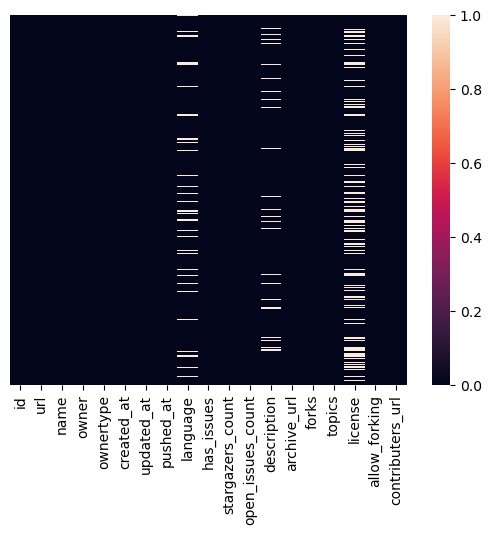

In [57]:
sns.heatmap(df.isnull() , yticklabels = False)

In [58]:
df.isna().sum()

id                       0
url                      0
name                     0
owner                    0
ownertype                0
created_at               0
updated_at               0
pushed_at                0
language              5573
has_issues               0
stargazers_count         0
open_issues_count        0
description           3119
archive_url              0
forks                    0
topics                   0
license              12276
allow_forking            0
contributers_url         0
dtype: int64

### Get Null value percentage per columns 

In [59]:
def analyze_dataframe(df):
    statistics = pd.DataFrame()

    # Column Data Types
    statistics['Column Data Types'] = df.dtypes

    # Column Valid Values Percentage
    total_rows = len(df)
    statistics['Column Valid Values'] = (df.count() / total_rows) * 100

    # Column Null Values Percentage
    statistics['Column Null Values'] = (df.isnull().sum() / total_rows) * 100

    return statistics

analyze_dataframe(df)

,Column Data Types,Column Valid Values,Column Null Values
id,int64,100.000000,0.000000
url,object,100.000000,0.000000
name,object,100.000000,0.000000
owner,object,100.000000,0.000000
ownertype,object,100.000000,0.000000
created_at,object,100.000000,0.000000
updated_at,object,100.000000,0.000000
pushed_at,object,100.000000,0.000000
language,object,88.977671,11.022329
has_issues,bool,100.000000,0.000000


### Delete the rows does not contain the language and the description  

In [60]:
df.dropna(subset=['language', 'description' , 'license'], inplace = True)

df.reset_index(drop=True, inplace=True)

In [61]:
print(f" Remaining Rows : {df.shape[0]} ")

 Remaining Rows : 34649 


### Show the empty list percentage 

In [62]:
# Convert strings to lists
df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Calculate percentage of empty lists
empty_lists_percentage = (df['topics'].apply(lambda x: len(x) == 0).sum() / len(df)) * 100

result_df = pd.DataFrame({'Column': ['topics'], 'Empty Lists Percentage': [empty_lists_percentage]})

result_df


,Column,Empty Lists Percentage
0,topics,28.055644


### Drop the rows who contains empty topics list 

In [63]:
df = df[df['topics'].apply(lambda x: len(x) > 0)]
df.reset_index(drop=True, inplace=True)

In [64]:
print(f" Remaining Rows : {df.shape[0]} ")

 Remaining Rows : 24928 


In [65]:
analyze_dataframe(df)

,Column Data Types,Column Valid Values,Column Null Values
id,int64,100.0,0.0
url,object,100.0,0.0
name,object,100.0,0.0
owner,object,100.0,0.0
ownertype,object,100.0,0.0
created_at,object,100.0,0.0
updated_at,object,100.0,0.0
pushed_at,object,100.0,0.0
language,object,100.0,0.0
has_issues,bool,100.0,0.0


### Process the description column 

In [66]:
def clean_description(description):
    if isinstance(description, str):
        return re.sub(r'[\U0001F000-\U0001FFFF]|[\U00010000-\U0010FFFF]|[\u2600-\u26FF]|\uD83C[\uDF00-\uDFFF]|\uD83D[\uDC00-\uDE4F]|\uD83D[\uDE80-\uDEFF]|\uD7C9[\uDC00-\uDDFF]|\u2728', '', description)
    else:
        return description
    
df['description'] = df['description'].apply(clean_description)

#### Convert columns "created_at" , "updated_at" , "pushed_at" to date 

In [67]:
# Convert the datetime columns to the desired format (YYYY-MM-DD)

df['created_at'] = pd.to_datetime(df['created_at']).dt.date
df['updated_at'] = pd.to_datetime(df['updated_at']).dt.date
df['pushed_at'] = pd.to_datetime(df['pushed_at']).dt.date

### Outlier info

<Axes: >

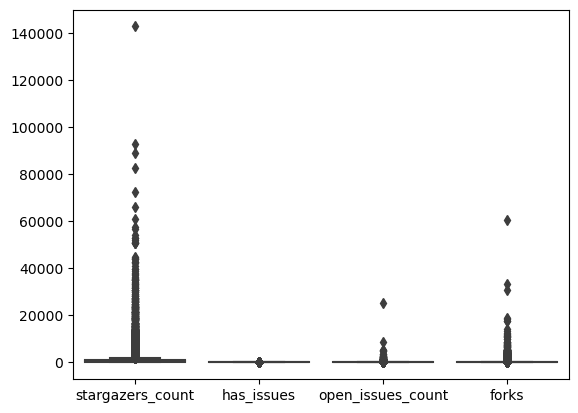

In [68]:
sb.boxplot(df[['stargazers_count','has_issues','open_issues_count' , 'forks']])

### stargazers_count , Outliers - Scatter Plot

In [69]:
column_name = 'stargazers_count'

output_notebook()

p = figure(title="Outliers - Scatter Plot")
p.circle(x=range(len(df)), y = df[column_name], size=5, color='navy')
p.xaxis.axis_label = 'Index'
p.yaxis.axis_label = column_name

show(p)

Loading BokehJS ...

### has_issues , Outliers - Scatter Plot

In [70]:
column_name = 'open_issues_count'

output_notebook() 

p = figure(title="Outliers - open_issues_count Outliers Scatter Plot")
p.circle(x=range(len(df)), y=df[column_name], size=5, color='navy')
p.xaxis.axis_label = 'Index'
p.yaxis.axis_label = column_name

show(p)


Loading BokehJS ...

### Traite License  display format 

In [71]:
df['license'] = df['license'].apply(lambda x: eval(x)['name'] if pd.notnull(x) else x)

### Save The Cleanned Data

In [72]:
df.to_csv('FirstData.csv')

# Second Part

In [25]:
df = pd.read_csv('SecondData.csv')

### Null Values

<Axes: >

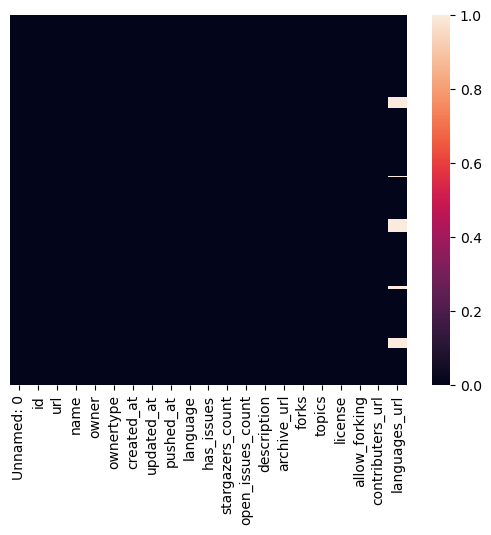

In [26]:
sns.heatmap(df.isnull() , yticklabels = False)

In [27]:
df.dropna(subset=['languages_url'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [93]:
df = pd.read_csv('finalData.csv')

### Trait the used_languages_percentage display format 

In [94]:
df['used_languages'] = df['used_languages'].apply(lambda x: {lang.split(':')[0]: lang.split(':')[1].strip('%') for lang in x.split(', ')})


In [95]:
import re

def extract_contributor_info(contributor_string):
    if isinstance(contributor_string, str):
        pattern = r"([^()]+) \(([^()]+)\) - (\d+) contributions"
        match = re.match(pattern, contributor_string)
        if match:
            name = match.group(1).strip()
            contributor_type = match.group(2).strip()
            contributions = int(match.group(3))
            return {
                'name': name,
                'type': contributor_type,
                'contributions': contributions
            }
    return {}

df['top_contributors'] = df['top_contributors'].apply(lambda x: [extract_contributor_info(c) for c in str(x).split(', ')])


### Delete The Rows that contain Jupyter Noteook as Languages  

In [96]:
df.drop(df[df['language'] == 'Jupyter Notebook'].index, inplace=True)
df.drop(df[df['language'] == 'HTML'].index, inplace=True)
df.drop(df[df['language'] == 'CSS'].index, inplace=True)

### Save The Final Cleanned Data

In [97]:
df.to_csv('FinalCleannedRepositories.csv')